# Fuel consumption prediction using Decision Tree regression

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

### The imports
First Things first, the imports, then import our data and lets have a look at it:

In [13]:
data = pd.read_csv("auto-mpg.csv") 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


One thing I like to do when I start to work with a new dataset is to look at the copleteness of the data:

In [17]:
print(data.shape)

data.isna().sum()

(398, 9)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Everything seems to work fine we have excelletn, lets get rid of the american values and clean up the data a bit:
* We wanna have the mpg in l/100 km - we use 235 as the factor
* The displacement in ccm - we use 16 as the factor
* The weight in kg
* As the horsepower column is not an integer lets fix this also real quick
* The **model year** nor the **origin** is a very big indicator for anything, so lets get rid of it as well

In [18]:
# Recalculate mgp to l/100 km with the factor 235
data['mpg'] = 235 / data['mpg']
data.rename(columns={'mpg':'l/100 km'}, inplace=True)

data['displacement'] = 16 * data['displacement']
data.rename(columns={'displacement':'ccm'}, inplace=True)

data['weight'] = data['weight'] / 2.5
data.rename(columns={'weight':'weight in kg'}, inplace=True)

data['acceleration'] = data['acceleration'] / 2.1
data.rename(columns={'acceleration':'0 - 100'}, inplace=True)

data = data.dropna()
data = data[data.horsepower != '?']
data['horsepower'] = data['horsepower'].astype('int64')

data.head()

,l/100 km,cylinders,ccm,horsepower,weight in kg,0 - 100,model year,origin,car name
0,13.055556,8,4912.0,130,1401.6,5.714286,70,1,chevrolet chevelle malibu
1,15.666667,8,5600.0,165,1477.2,5.476190,70,1,buick skylark 320
2,13.055556,8,5088.0,150,1374.4,5.238095,70,1,plymouth satellite
3,14.687500,8,4864.0,150,1373.2,5.714286,70,1,amc rebel sst
4,13.823529,8,4832.0,140,1379.6,5.000000,70,1,ford torino


Before taking a look at the correlation of the data lets have a deeper look at the data to know what we are working with:

In [19]:
data.sort_values('l/100 km',ascending = False).head(5)

,l/100 km,cylinders,ccm,horsepower,weight in kg,0 - 100,model year,origin,car name
28,26.111111,8,4864.0,193,1892.8,8.809524,70,1,hi 1200d
25,23.500000,8,5760.0,215,1846.0,6.666667,70,1,ford f250
26,23.500000,8,4912.0,200,1750.4,7.142857,70,1,chevy c20
67,21.363636,8,6864.0,208,1853.2,5.238095,72,1,mercury marquis
27,21.363636,8,5088.0,210,1752.8,6.428571,70,1,dodge d200


In [20]:
data.sort_values('l/100 km',ascending = True).head(5)

,l/100 km,cylinders,ccm,horsepower,weight in kg,0 - 100,model year,origin,car name
322,5.042918,4,1376.0,65,844.0,8.523810,80,3,mazda glc
329,5.269058,4,1456.0,67,740.0,6.571429,80,3,honda civic 1500 gl
325,5.304740,4,1440.0,48,834.0,10.333333,80,2,vw rabbit c (diesel)
394,5.340909,4,1552.0,52,852.0,11.714286,82,2,vw pickup
326,5.414747,4,1440.0,48,934.0,11.285714,80,2,vw dasher (diesel)


## Data exploration

For me it is often very useful to look at some easy statistics of the data like the mean, median, max min etc... so lets do this:
You can see we can make do this on two ways, either using numpy and calculate the stats, or use the build in describe function by the pandas library:

In [21]:
# Minimum price of the data
minimum_price = np.amin(data['l/100 km'])

# Maximum price of the data
maximum_price = np.amax(data['l/100 km'])

# Mean price of the data
mean_price = np.mean(data['l/100 km'])

# Median price of the data
median_price = np.median(data['l/100 km'])

# Standard deviation of prices of the data
std_price = np.std(data['l/100 km'])

print("Minimum fuel usage: {}".format(minimum_price)) 
print("Maximum fuel usage: {}".format(maximum_price))
print("Mean fuel usage: {}".format(mean_price))
print("Median fuel usage {}".format(median_price))
print("Standard deviation of fuel usage: {}".format(std_price))

data['l/100 km'].describe()

Minimum fuel usage: 5.042918454935622
Maximum fuel usage: 26.11111111111111
Mean fuel usage: 11.238270555565762
Median fuel usage 10.330917874396135
Standard deviation of fuel usage: 3.9052771700335325


count    392.000000
mean      11.238271
std        3.910268
min        5.042918
25%        8.103448
50%       10.330918
75%       13.823529
max       26.111111
Name: l/100 km, dtype: float64

## Visualisation

This gave us some further insights, now we know some more about our data lets take a look at the relations between the data, we set up a quick heatmap:

### Regplot
 
 Lets look at the correlation between the fuel usage and the ccm by using a so called regplot, this is one of the easiest plots available and a good starting point to look at the data:  


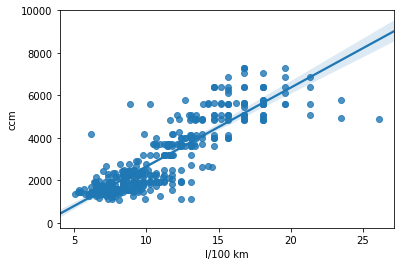

In [22]:
plt = sns.regplot(x=data['l/100 km'], y=data['ccm'], fit_reg=True)

### Distribution

Another interesting visualisation is the distribution of the data, we are gonna check that with the following code:




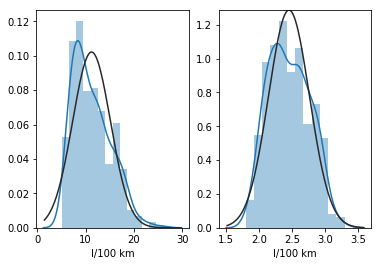

In [25]:
from scipy.stats import norm

fig, ax =plt.subplots(1,2)

sns.distplot(data['l/100 km'] , fit=norm, ax=ax[0])
sns.distplot(np.log1p(data['l/100 km']) , fit=norm, ax=ax[1])

Our variable is already pretty normally distributed, even though it leans a bit to the right, this can be corrected by using the log, as seen in plot 2, but we are not gonna worry too much about that.

### Probability


TODO: Describe


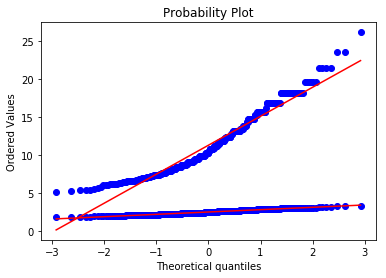

In [26]:
from scipy import stats

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(np.log1p(data['l/100 km']))
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

res = stats.probplot(np.log1p(data['l/100 km']), plot=plt)
res = stats.probplot(data['l/100 km'], plot=plt)

### Boxplot 
We saw from the statistics of median, mean, max and min that the data is not really evenly distributed, lets have a look at the data via a boxplot:

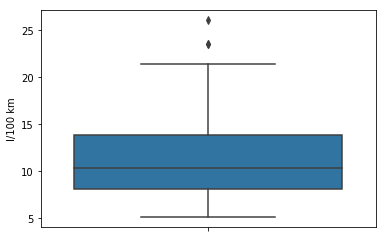

In [27]:
sns.boxplot(data['l/100 km'], orient='v')

We see our assumption confirmed, most of our data is in the lower part, in between 7 and 13 l/100 km.

### Heatmap

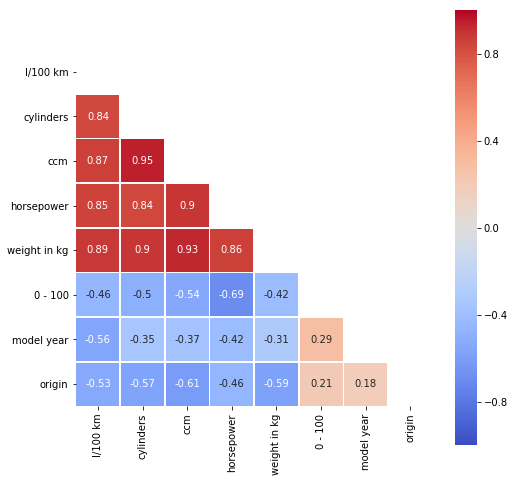

In [28]:
# Remove mirrored correlation
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Size of heatmap
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data.corr()
                      , mask=mask
                      , vmin=-1
                      , vmax=1
                      , cmap='coolwarm'
                      , square=True
                      , annot=True
                      , linewidths=.7
)

First thing we see is that there i a big correlation between cylinders and the size of the engine of the car, nothing surprising - I am more surprised that the acceleration does not affect the mpg in any way, this was also alredy visible when we took a look at our top and bottom consumers.

## Single column heat map
As the **mpg** is our target variable lets take a deeper look at only the correlations between the **mpg** and the other features

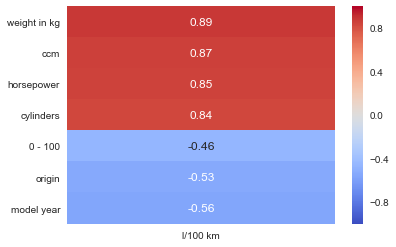

In [30]:
plt.figure(figsize=(6,4))
sns.set(font_scale=1)

sns.heatmap(data.corr()[['l/100 km']].sort_values('l/100 km',ascending=False)[1:]
                     , annot=True
                     , vmin=-1
                     , vmax=1
                     , cmap='coolwarm'
)

plt.show();

### Correlation in a barchart

A heatmap is often really useful, but if you wanna just analyze one feature of your dataset, something like this might help you often more than a heatmap:

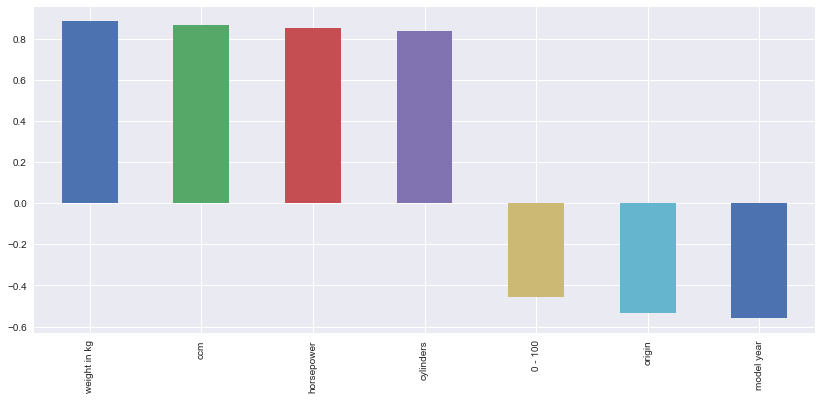

In [31]:
corr_with_sale_price = data.corr()['l/100 km'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop('l/100 km').plot.bar()
plt.show();


Nothing to surprising to see in this chart, often its personal preference which you like more, a barchart makes in general more sense if you have a lot of features(100+), with 7 features like in this case I prefer the heatmap.

### Pairplot

Another chart which might give us some insight in the data is the so called pairplot chart

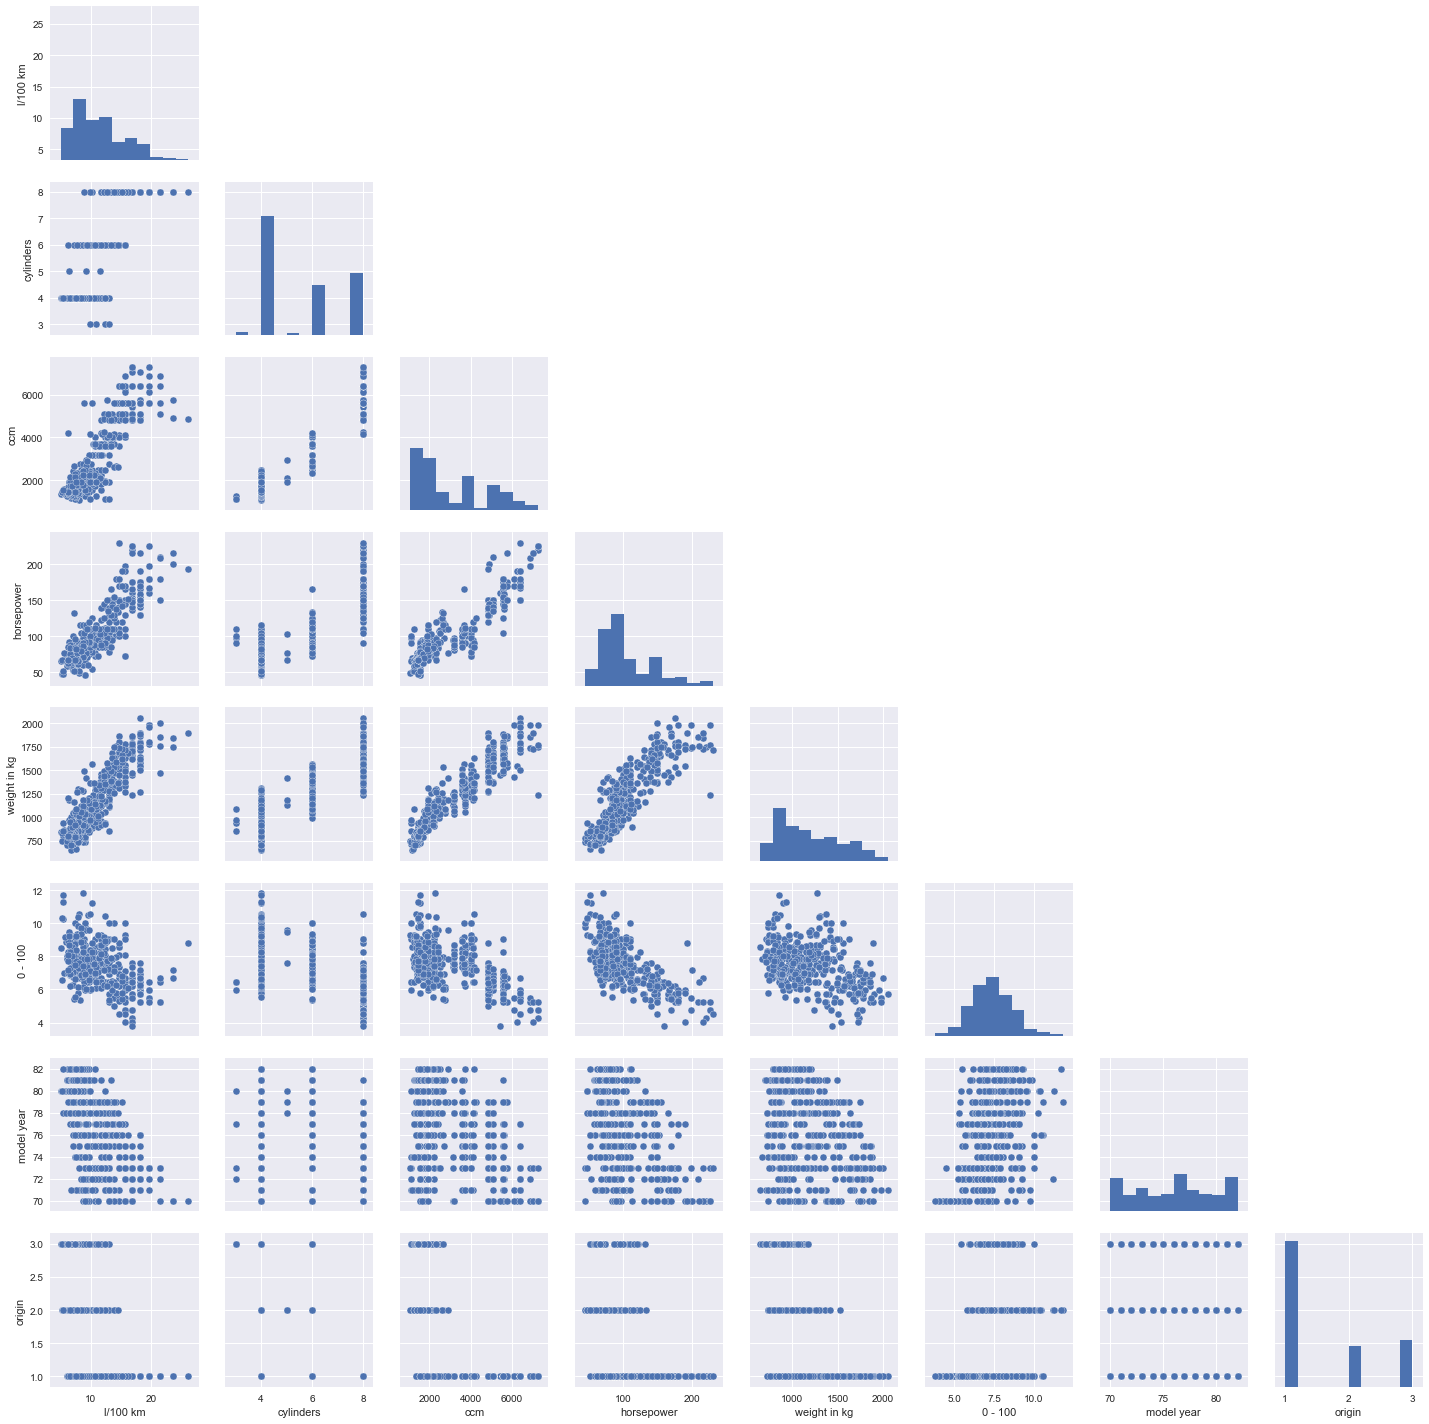

In [32]:
g = sns.pairplot(data, size=2.5)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

Pairplots are a very good tool to see linear relationsships between the data, we see a lot here mostly between:
* l/ 100 km
* ccm
* horsepower
* weight in km

PS: Have you spotted that the **acceleration (0 - 100)** column is normally distributed?
We can visually confirm this pretty good with a boxplot, it should have q1 and q3 similarly far away from the center(the mean)

7.400631681243928


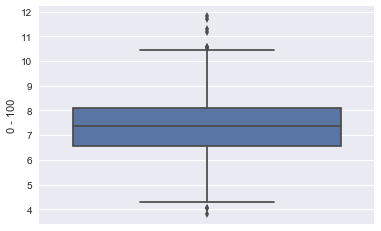

In [33]:
mean_price = np.mean(data['0 - 100'])
print(mean_price)

# Make boxplot for one group only
sns.boxplot( data['0 - 100'], orient='v')

Exactly what we expected!

### Clustering

Sometimes a 3D model of our data shows us some further insights in our data, and for our dataset in which model year and origin are not really good defined, lets take a look at the correlation of this two with our target column, the fuel usage:

Lets first find out a good amount of clusters to use, we will use the elbow method:

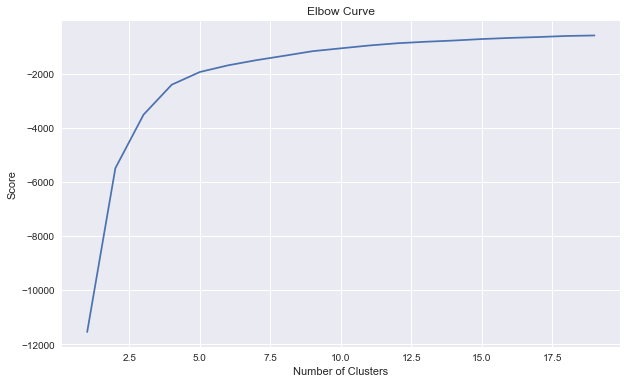

In [34]:
from sklearn.cluster import KMeans

data_cluster = data[['l/100 km', 'model year', 'origin']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data_cluster) for i in n_cluster]
scores = [kmeans[i].score(data_cluster) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();


After around 8 clusters we see no big benefit anymore, so lets use 8 as our number of cluster, next we create the 3d Model I was talking about earlier on:

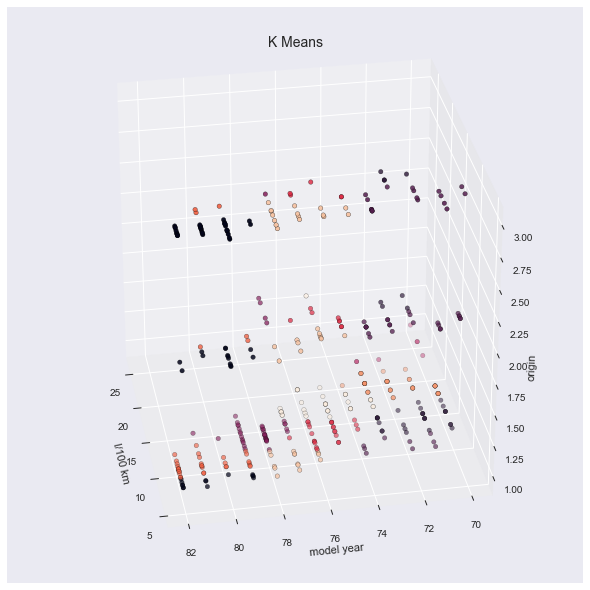

In [35]:
from mpl_toolkits.mplot3d import Axes3D

X = data_cluster
X = X.reset_index(drop=True)

km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, azim=170)

ax.scatter(X.iloc[:,0]
                 , X.iloc[:,1]
                 , X.iloc[:,2]
                 , c=labels.astype(np.float), edgecolor="k"
)

ax.set_xlabel("l/100 km")
ax.set_ylabel("model year")
ax.set_zlabel("origin")

plt.title("K Means", fontsize=14);

This did not help us, we give them another change with another technique!

### Feature definition

Lets use following technique to find out which features might be useful for our model and which not:

In [36]:
# We need a new import in order for this to work
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

predictors = ['cylinders', 'ccm', 'horsepower', 'weight in kg', '0 - 100', 'model year', 'origin']
target = data['0 - 100']
features = data[predictors]

regressor = DecisionTreeRegressor()
selector8 = RFE(regressor, 4)
selector8 = selector8.fit(features, target)

sorted(list(zip(predictors, selector8.support_, selector8.ranking_)), key=lambda x: x[2])

[('horsepower', True, 1),
 ('weight in kg', True, 1),
 ('0 - 100', True, 1),
 ('model year', True, 1),
 ('ccm', False, 2),
 ('cylinders', False, 3),
 ('origin', False, 4)]

Thats it, we are gonna drop the 2 columns:

**Note:** even though ccm is a good predictor, it was removed because it tells us nearly the same as horsepower or cylinders, so we dont need 3 nearly *identically* columns, never the less, we are gonna keep ccm, because we know the model year has a lower impact on the fuel_usage than the ccm.


In [37]:
data = data.drop(['model year', 'origin'], axis=1)

Enough with the exploration of the data we wanna see some results: 

Lets see if we have enough data available to train a model which can help us predict the fuel consumption of the car given following parameters:
* cylinders
* displacement
* horse power
* weight
* acceleration

### Preparing the model

We have a few big steps to take
1. First thing we are gonna do is split the data up in training and testing data!
2. Train the model.
3. Evaluate the results

## Splitting the data into Training and Testing data

We need the imports first - then we have to remove the target column from the dependent variables and add it seperate as the target column/ independent column and then we have need only one line to split the data:

In [38]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

fuel_usage = data['l/100 km']
features = data.drop( ['l/100 km', 'car name'], axis = 1)

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, fuel_usage, test_size=0.10, random_state = 42)

features.head()

,cylinders,ccm,horsepower,weight in kg,0 - 100
0,8,4912.0,130,1401.6,5.714286
1,8,5600.0,165,1477.2,5.476190
2,8,5088.0,150,1374.4,5.238095
3,8,4864.0,150,1373.2,5.714286
4,8,4832.0,140,1379.6,5.000000


After trying around a bit with the values I found out that a test size of **.1** is a good compromise between over- and underfitting.

### Configuring the model

Next lets write a function which helps us to find the best hyperparameters of the model:

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth':[1,2,3,4,5,6,7,8,9,10]
                      , 'criterion': ['friedman_mse', 'mse', 'mae']
                      , 'splitter': ['best', 'random']
                      , 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
                      #, 'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
                      #, 'max_leaf_nodes':  [None, 2,3,4,5,6,7,8,9,10]
                      #, 'min_impurity_decrease': [0, 1,2,3,4,5,6,7,8,9,10]
                      , 'presort' :[True, False]
    }

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


### Fitting the model

Next check what our function will give us is we try to fit some data into it:

In [42]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is '{}' for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'criterion' is '{}' for the optimal model.".format(reg.get_params()['criterion']))
print("Parameter 'splitter' is '{}' for the optimal model.".format(reg.get_params()['splitter']))
print("Parameter 'min_samples_leaf' is '{}' for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_weight_fraction_leaf' is '{}' for the optimal model.".format(reg.get_params()['min_weight_fraction_leaf']))
#print("Parameter 'max_leaf_nodes' is '{}' for the optimal model.".format(reg.get_params()['min_weight_fraction_leaf']))
#print("Parameter 'min_impurity_decrease' is '{}' for the optimal model.".format(reg.get_params()['min_weight_fraction_leaf']))
print("Parameter 'presort' is '{}' for the optimal model.".format(reg.get_params()['min_weight_fraction_leaf']))

Parameter 'max_depth' is '6' for the optimal model.
Parameter 'criterion' is 'mae' for the optimal model.
Parameter 'splitter' is 'best' for the optimal model.
Parameter 'min_samples_leaf' is '8' for the optimal model.
Parameter 'min_weight_fraction_leaf' is '0.0' for the optimal model.
Parameter 'presort' is '0.0' for the optimal model.


### Testing the model:

We found out that the optimal value for max_depth is 2, lets test out how good the regressor performs on our testing data:

In [41]:
# We use the score function to evaluate how good our regressor peforms on our testing data
reg.score(X_test, y_test)

NameError: name 'reg' is not defined

Next lets try and make some preditions with data generated by us, our input parameters are:
* cylinders
* ccm
* horsepower
* weight in kg	
* 0 - 100

In [ ]:
Lets test out how good the regressor performs on our testing data:

In [40]:
# Lets test the model with a few real world values
car_data = [[4, 1400, 125, 1370, 96]
                     ,[3, 1400, 75, 1300, 15]
                     ,[8, 5000, 620, 1800, 4]]  


for i, fuel_usage in enumerate(reg.predict(car_data)):
   print("Predicted fuel consume for Car {}'s is: {:,.2f}".format(i+1, fuel_usage))


NameError: name 'reg' is not defined

Please keep in minde when seeing this values that our dataset contains mostly out of old american cars with huge motors and big fuel usage, our model is not really adapted on the modern european middle class car which we are testing with.

### XGBoost

Lets try another approach, calles XGBoost, which is widely used library for ML:

In [39]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[21:48:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9289851110758717
Test r2 score:  0.8224169790297358
Train RMSE: 0.9720
Test RMSE: 1.6762


We see alredy with no hyperparameter tuning we alredy have a much higher score than with our _standard_ DecisionTreeRegressor, lets try out some hyperparameter tuning in the next step, but first some predictions:

In [40]:
from pandas import DataFrame

car_data = {'cylinders': [4]
                    , 'ccm': [1400]
                    , 'horsepower': [125]
                    , 'weight in kg': [1430]
                    , '0 - 100': [5]
}

car_data_df = DataFrame(car_data,columns= ['cylinders', 'ccm', 'horsepower', 'weight in kg', '0 - 100'])

print (car_data_df)


#car_data = ['cylinders'=4, ccm=1400, horsepower=125, 'weight in kg'=1370, '0 - 100'=5]

preds = xgb_model1.predict(car_data_df)

print(preds)

   cylinders   ccm  horsepower  weight in kg  0 - 100
0          4  1400         125          1430        5
[10.845233]


### Hyper Parameter Tuning XGBoost regressor

We can test among other following params for our XGBoost Model:




In [41]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

### A new way of visualising data

The days of matplot lib might be over, a new interactive, even easier to configure library is the new brigther start on the data visualising heaven, called ploty, let me present it to you:


In [60]:
#!pip install "notebook>=5.3" "ipywidgets>=7.2"

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(y=data['l/100 km']))
fig.show()

As you can see at first sight the plots look better, no question, and the more important part, they are interactive, you can hover over them and see the data points, and also zoom in, give it a try!

### Model performance

In [6]:
from vpython import *


vs.ModelLearning(features, fuel_usage)
#vs.ModelComplexity(X_train, y_train)
vs.PredictTrials(features, prices, fit_model, client_data)
print("done")


AttributeError: module 'vpython' has no attribute 'ModelLearning'